In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv(r"../Data/SurveyQuantitativeData_Downloaded_050820_1240PM.csv")
data.head(5)

,SubmissionDate,starttime,endtime,duration,consent,age,gender,degree,international,closure_cam,...,anx_nextmo_l,anx_summer_l,anx_longterm_l,inst_country_l,country_l,starttime_l,endtime_l,duration_m,duration_m_bins,KEY
0,2020-03-26T20:18:47.489Z,2020-03-26T20:14:11.009Z,2020-03-26T20:18:47.454Z,276,1,29.0,1.0,3.0,1.0,1.0,...,Much Worse,Much Worse,Same,United States of America (USA),United States of America (USA),43916.84318,NaN,4.600000,< 05min,uuid:6eea9132-51d2-4374-86b3-b6c0f577320f
1,2020-03-26T20:23:23.636Z,2020-03-26T20:12:44.933Z,2020-03-26T20:23:23.601Z,639,1,28.0,1.0,3.0,0.0,1.0,...,Much Worse,Much Worse,Worse,United States of America (USA),United States of America (USA),43916.84218,NaN,10.650000,< 20min,uuid:dcfed972-e812-4f55-b2de-eb84c15f94bb
2,2020-03-26T20:28:57.413Z,2020-03-26T20:19:12.163Z,2020-03-26T20:28:57.379Z,585,1,28.0,1.0,3.0,1.0,1.0,...,Much Worse,Much Worse,NaN,United States of America (USA),United States of America (USA),43916.84667,NaN,9.750000,< 10min,uuid:0c54d613-c231-4e6d-80af-bf064a3e7b0b
3,2020-03-26T20:31:24.684Z,2020-03-26T20:25:23.356Z,2020-03-26T20:31:24.651Z,361,1,30.0,1.0,3.0,0.0,1.0,...,Much Worse,Much Worse,Same,Canada,Canada,43916.85096,NaN,6.016667,< 10min,uuid:f7f12518-15bc-4e61-a60b-bc6273cfdab5
4,2020-03-26T20:33:49.878Z,2020-03-26T20:28:12.695Z,2020-03-26T20:33:49.848Z,337,1,NaN,1.0,3.0,1.0,1.0,...,Much Worse,Worse,NaN,United States of America (USA),United States of America (USA),43916.85292,NaN,5.616667,< 10min,uuid:3cfb3fec-c6ae-4d9b-848e-49ec331e9b54


In [3]:
data.columns.values

array(['SubmissionDate', 'starttime', 'endtime', 'duration', 'consent',
       'age', 'gender', 'degree', 'international', 'closure_cam',
       'closure_res', 'closure_date', 'location', 'location_perm',
       'living', 'vulnerable', 'quarantine', 'experienced', 'dis_label',
       'dis_healthcare', 'dis_internet', 'dis_academic', 'dis_social',
       'dis_psych', 'change', 'fin_exp', 'fin_inc', 'fin_aid', 'fin_debt',
       'exp_type', 'exp_more', 'exp_less', 'inc_more', 'inc_less',
       'aid_more', 'aid_less', 'debt_more', 'debt_less', 'inst_response',
       'anx_label', 'anx_nextmo', 'anx_summer', 'anx_longterm',
       'inst_country', 'country', 'consent_l', 'gender_l', 'degree_l',
       'international_l', 'closure_cam_l', 'closure_res_l', 'location_l',
       'location_perm_l', 'living_l', 'vulnerable_l', 'quarantine_l',
       'dis_healthcare_l', 'dis_internet_l', 'dis_academic_l',
       'dis_social_l', 'dis_psych_l', 'fin_exp_l', 'fin_inc_l',
       'fin_aid_l', 'fin_debt

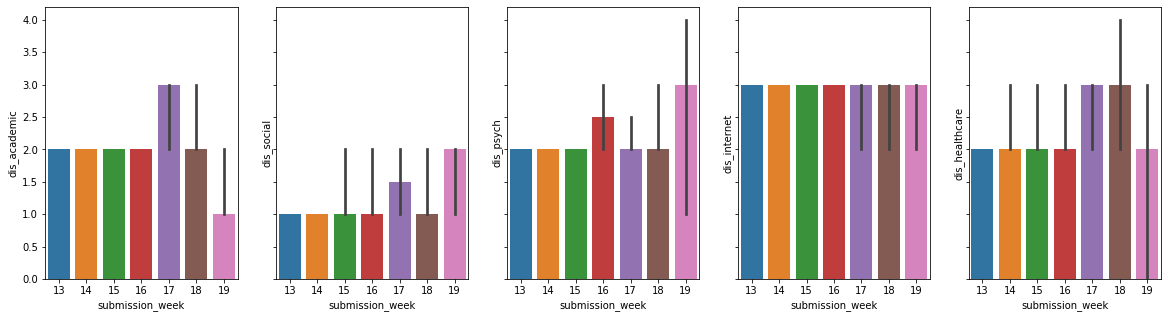

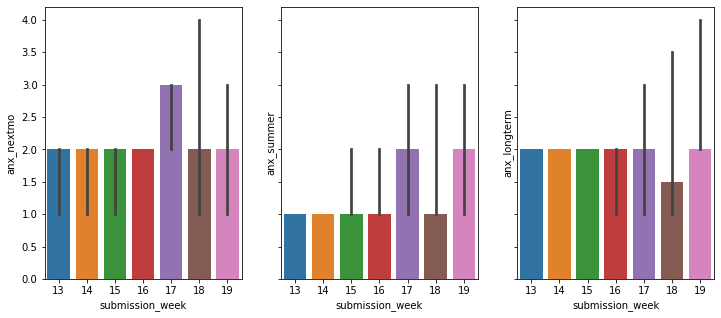

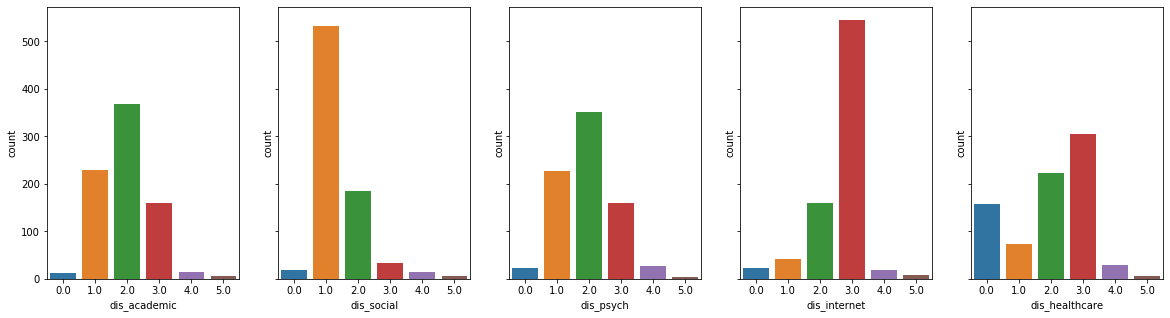

In [33]:
data['submission_week'] = pd.to_datetime(data['SubmissionDate']).dt.week
fig1, (ax11, ax12, ax13, ax14, ax15) = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(20,5))
sns.barplot(x='submission_week',y='dis_academic', data=data, estimator=np.median, ax=ax11)
sns.barplot(x='submission_week',y='dis_social', data=data, estimator=np.median, ax=ax12)
sns.barplot(x='submission_week',y='dis_psych', data=data, estimator=np.median, ax=ax13)
sns.barplot(x='submission_week',y='dis_internet', data=data, estimator=np.median, ax=ax14)
sns.barplot(x='submission_week',y='dis_healthcare', data=data, estimator=np.median, ax=ax15)
fig2, (ax21, ax22, ax23) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
sns.barplot(x='submission_week',y='anx_nextmo', data=data, estimator=np.median, ax=ax21)
sns.barplot(x='submission_week',y='anx_summer', data=data, estimator=np.median, ax=ax22)
sns.barplot(x='submission_week',y='anx_longterm', data=data, estimator=np.median, ax=ax23)
fig3, (ax31, ax32, ax33, ax34, ax35) = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(20,5))
sns.countplot(data['dis_academic'], ax=ax31)
sns.countplot(data['dis_social'], ax=ax32)
sns.countplot(data['dis_psych'], ax=ax33)
sns.countplot(data['dis_internet'], ax=ax34)
sns.countplot(data['dis_healthcare'], ax=ax35)

In [5]:
def presplit_removal(input_data, target_var):
    new_data = input_data[input_data['consent'] == 1]
    new_data = new_data.dropna(subset=[target_var])
    new_data = new_data[new_data[target_var] != 0]
    return new_data

In [6]:
presplit_data = presplit_removal(data, 'dis_academic')
from sklearn.model_selection import train_test_split, cross_val_score
train, test = train_test_split(presplit_data, test_size=0.2, random_state=42)

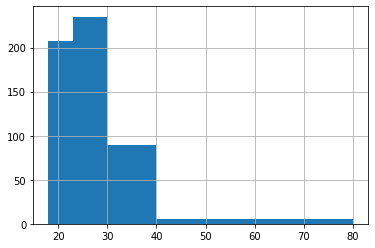

In [7]:
train['age'].hist(bins=[18,23,30,40,80])

0.7078322580645162
[[71 25]
 [18 11]]


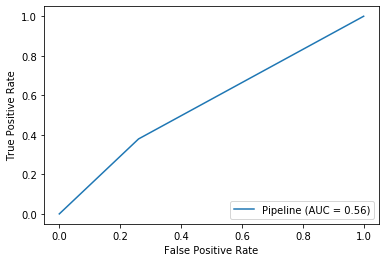

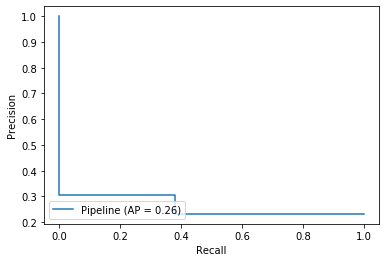

[ 1  1 30 50 41 31 13 48 70 53 27  9 54 71 75 55 20 76 60  7 10 24 11 67
 78 80 43 16 12 89 92 79 22 17 39  1 57 52 59 77  1 26 85 62 81 51  5  1
  1 29 36 95 96  1 61 63 65  1 69 14 73 46  6 94 64 47 68 93 35 56 83 33
 37 15  1 91 90  4 44  8 74 72 66 84 18 19 87 86 21 42  2 23 32 82 88 49
  3 58 25 40 38  1 45 34 28]
0.7672645161290322
[[95  1]
 [24  5]]


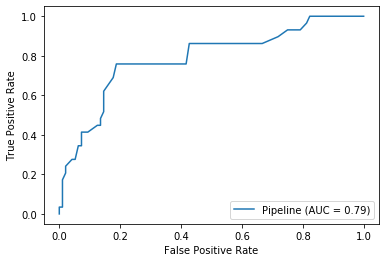

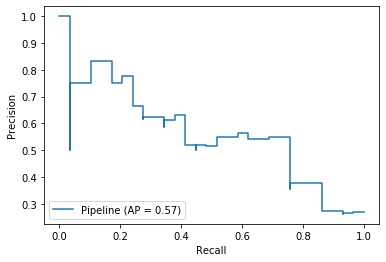

[ 1  1 21 96 56 28  1 38 75 68 15 37 80 85 94 32 11 83 54  1 23 62 30 41
 95 29  1 18 52 47 66 57 33 49 14  1 73 59 90 63 26 13 74 53 87  1 22 31
 10 61 77 16 20  5 46 79 92 17  1 40 93 36  6 86 78 55 48 91 82 70 42 58
 44  4 27 84 64 19  1 12 51 88 67  1 24 50 65 71 60 34  9  2 76 89 81 35
  3 72 43 25  8  7 45 39 69]
Feature ranking:
1. feature 0 (0.039478)
2. feature 45 (0.026619)
3. feature 53 (0.024687)
4. feature 91 (0.024603)
5. feature 35 (0.021073)
6. feature 83 (0.020892)
7. feature 19 (0.020853)
8. feature 48 (0.019903)
9. feature 79 (0.019171)
10. feature 101 (0.018540)
11. feature 58 (0.018014)
12. feature 62 (0.017683)
13. feature 6 (0.017642)
14. feature 51 (0.017267)
15. feature 52 (0.017104)
16. feature 41 (0.016849)
17. feature 100 (0.016404)
18. feature 57 (0.016358)
19. feature 20 (0.016352)
20. feature 46 (0.016194)
21. feature 32 (0.015870)
22. feature 84 (0.015769)
23. feature 2 (0.015700)
24. feature 73 (0.015697)
25. feature 26 (0.015582)
26. feature 27 (0.0152

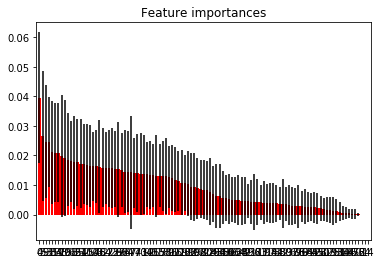

0.776890322580645
[[91  5]
 [23  6]]


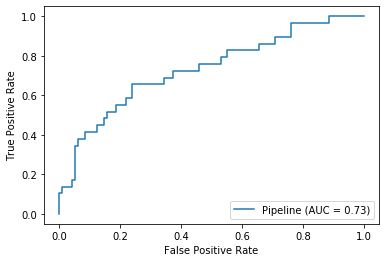

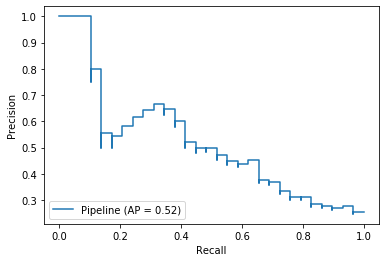

[19 53 15 45  7 13 44  9 37 59 43 25 61 63 69 60 29 71 72 35  6 11 49 42
 85 86 28 83 84 65 73 74 40 30 88 16 92  1  5  1 12 46 47  1  3  2  4 75
  1 89 93  1 31 14 82 62 55 54 27 39 64 77  1 67 66 32 20 78 79 36  1 87
  8 90 41 52 76 24 23  1 68 80 81 22 70 21 58 57 26 38 94 10 17 95 91  1
 18 48 50  1 33 51 56 34 96]
[[ 0.18391078  0.         -0.14484775  0.          0.07423698 -0.40728009
   0.         -0.47867457  0.01680051  0.          0.         -0.13877643
   0.          0.          0.          0.         -0.05568757  0.
   0.          0.11737335 -0.78290125 -0.90452492 -0.08298543  0.
   0.          0.          0.          0.          0.         -0.07052928
  -0.10953273  0.         -0.05457192 -0.29303277  0.          0.16072709
   0.          0.         -0.41525733 -1.16840699 -0.45842831  0.
   0.          0.84512796 -0.46647278 -0.95871023 -0.52984693  0.
   1.28136066  0.          0.         -0.56560507 -0.13398473  0.13489579
   0.          0.          0.         -0.1970

In [31]:
def data_cleaning(raw_data, target_var):
    clean_data = raw_data.drop(columns=['SubmissionDate', 'starttime', 'endtime', 'duration','dis_label','change',
                                          'anx_label','closure_date','experienced','exp_type','exp_more','exp_less', 'inc_more', 'inc_less','aid_more', 
                                          'aid_less', 'debt_more', 'debt_less','starttime_l', 'endtime_l', 
                                          'duration_m', 'duration_m_bins', 'KEY'])
    labels = ['consent', 'gender', 'degree','international', 'closure_cam', 'closure_res', 'location','location_perm', 
              'living', 'vulnerable', 'quarantine','dis_healthcare', 'dis_internet', 'dis_academic','dis_social', 
              'dis_psych', 'fin_exp', 'fin_inc','fin_aid', 'fin_debt', 'inst_response', 'anx_nextmo','anx_summer', 
              'anx_longterm', 'inst_country', 'country']
    for feature in labels:
        clean_data[feature].fillna(clean_data[feature+'_l'], inplace=True)
    clean_data = clean_data.drop(columns=[label+'_l' for label in labels])
    clean_data = clean_data.replace('No', 0)
    clean_data = clean_data.replace('Domestic', 0)
    clean_data = clean_data.replace('United States of America (USA)', 0)
    clean_data['age_group'] = pd.cut(x=clean_data['age'], bins=[17,23,30,40,80], labels=['ug','mid20s','30s', '40+'])
    clean_data['age_group'] = clean_data['age_group'].cat.add_categories('unknown').fillna('unknown')
    clean_data['gender'] = clean_data['gender'].fillna(4) #not listed or prefer not to answer
    clean_data['degree'] = clean_data['degree'].fillna(5) #other
    clean_data['location'] = clean_data['location'].fillna(5) #other
    clean_data[['closure_cam','closure_res','location_perm']] = clean_data[['closure_cam','closure_res','location_perm']].fillna(2) #yes-no
    clean_data[['dis_healthcare','dis_internet','dis_academic','dis_social','dis_psych']] = clean_data[['dis_healthcare','dis_internet','dis_academic','dis_social','dis_psych']].fillna(0)    
    clean_data[['fin_exp','fin_inc','fin_aid','fin_debt']] = clean_data[['fin_exp','fin_inc','fin_aid','fin_debt']].fillna(0)    
    clean_data['inst_response'] = clean_data['inst_response'].fillna(4) #unknown
    clean_data[['anx_nextmo','anx_summer','anx_longterm']] = clean_data[['anx_nextmo','anx_summer','anx_longterm']].fillna(0)    
    clean_data[['inst_country','country']] = clean_data[['inst_country','country']].fillna(-1)
    clean_data.loc[clean_data['inst_country'] > 0, 'inst_country'] = 1
    clean_data.loc[clean_data['country'] > 0, 'country'] = 1
    clean_data = clean_data.drop(columns=['consent','age'])
    X = clean_data.drop(columns=[target_var])
    y = clean_data[target_var]
    y = y.replace([1, 2], 0)
    y = y.replace([3, 4, 5], 1)
    return X, y
Xtrain, Ytrain = data_cleaning(train, 'dis_academic')
#for col in Xtrain.columns:
#    print(col)
#    print(Xtrain[col].unique()) #need to specify categories for all of them
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, plot_roc_curve, plot_precision_recall_curve
category_values = [[1,2,3,4],[1,2,3,4,5],[0,1],[0,1,2],[0,1,2],[1,2,3,4],[0,1,2],[1,2,3],[0,1],[0,1],
                   [0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3],[0,1,2,3],[0,1,2,3],
                   [0,1,2,3],[1,2,3,4],[0,1,2,3,4,5],[0,1,2,3,4,5],[0,1,2,3,4,5],[-1,0,1],[-1,0,1],
                   ['mid20s', 'ug', '30s', 'unknown', '40+']]
prep = ColumnTransformer(transformers=[('numeric', StandardScaler(), ['submission_week'])], remainder=OneHotEncoder(categories=category_values))
classifiers = [DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(penalty='l1',solver='liblinear')]
count=0
for classifier in classifiers:
    clf = Pipeline(steps=[('preprocessor', prep),('classifier', classifier)])
    selector = Pipeline(steps=[('preprocessor', prep),('selector',RFE(estimator=classifier,n_features_to_select=10))])
    print(cross_val_score(clf, Xtrain, Ytrain, cv=5, scoring='accuracy').mean())
    x_tr, x_te, y_tr, y_te = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)
    clf.fit(x_tr, y_tr)
    print(confusion_matrix(y_te,clf.predict(x_te)))
    plot_roc_curve(clf, x_te, y_te)
    plt.show()
    plot_precision_recall_curve(clf, x_te, y_te)
    plt.show()
    selector = selector.fit(Xtrain, Ytrain)
    print(selector.named_steps['selector'].ranking_)
    if count == 2:
        print(clf.named_steps['classifier'].coef_, clf.named_steps['classifier'].intercept_)
    if count == 1: #https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
        importances = clf.named_steps['classifier'].feature_importances_
        std = np.std([tree.feature_importances_ for tree in clf.named_steps['classifier'].estimators_],
             axis=0)
        indices = np.argsort(importances)[::-1]

        # Print the feature ranking
        print("Feature ranking:")

        for f in range(105):
            print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

        # Plot the feature importances of the forest
        plt.figure()
        plt.title("Feature importances")
        plt.bar(range(105), importances[indices],
        color="r", yerr=std[indices], align="center")
        plt.xticks(range(105), indices)
        plt.xlim([-1, 105])
        plt.show()
    count += 1


In [22]:
import sklearn #make sure at least 0.22
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


<1x105 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>